In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette("husl")

In [7]:
C = 4 # Number of clusters = 4 
m = 2 
dataset = {'Physics':['Low','Med','Med','Med','Med','High','Low','High','Med','Low'],
       'Chemistry':['Low','Low','Low','High','Low','High','High','Low','High','Low'],
       'Maths':['Low','Low','High','High','High','Low','Low','Low','Low','High'],
       'Pass':['No','No','Yes','No','Yes','Yes','No','Yes','Yes','Yes']}
df = pd.DataFrame(dataset,columns=['Physics','Chemistry','Maths','Pass'])
data=df

In [8]:
def initialize_memberships(data, C):
    N, _ = data.shape
    mems = np.random.random((N, C))   
    return mems / mems.sum(axis=1, keepdims=True)

In [4]:
def update_centres(data, memberships, m):
    mems = memberships ** m
    weights = mems / mems.sum(axis=0)
    return np.dot(weights.T, data)

In [5]:
def get_distances(data, centres):
    return np.sqrt(((data[:, None] - centres)**2).sum(axis=2)) 

In [6]:
def update_memberships(data, centres, m):
    dist = get_distances(data, centres)
    dist = dist[:, None, :] / dist[:, :, None]
    dist = dist ** (2/(m-1))
    return 1/dist.sum(axis=1)

In [7]:
def fcmeans(data, C, m):
    memberships = initialize_memberships(data, C)
    initial_centres = update_centres(data, memberships, m)
    old_memberships = np.zeros_like(memberships)
    while not np.allclose(memberships, old_memberships):
        old_memberships = memberships
        centres = update_centres(data, memberships, m)
        memberships = update_memberships(data, centres, m)
    return memberships, centres, initial_centres

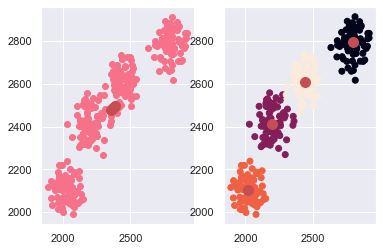

In [8]:
C = 4
m = 2
data = np.load('C:/Users/Tejsv Gupta/Documents/3RD YEAR/ml/lab/data.csv')

memberships, centres, initial_centres = fcmeans(data, C, m)

plt.subplot(121)
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(initial_centres[:, 0], initial_centres[:, 1], c='r', s=100)
plt.subplot(122)
plt.scatter(data[:, 0], data[:, 1], c=memberships.argmax(axis=1))
plt.scatter(centres[:, 0], centres[:, 1], c='r', s=100)
plt.show()